# 퍼셉트론

'인공 신경망'은 수많은 머신 러닝 방법 중 하나이다. 

인공 신경망을 복잡하게 쌓아 올린 것이 '딥러닝'이다.

초기의 인공 신경망인 퍼셉트론(Perceptron)에 대해 알아보자.


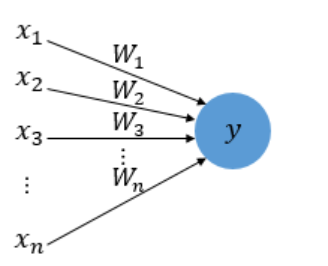

퍼셉트론은 한마디로 **다수의 입력으로부터 하나의 결과를 내보내는 알고리즘**이다.

여기서 W는 가중치이며, y는 출력값이다. 

여러 입력 x가 저마다의 가중치와 곱해져 뉴련에 보내지고 이를 모두 더한 값이 임계치(threshold)를 넘으면 출력 신호로 1을 출력하고, 넘지 못하면 0을 출력한다. 

이러한 함수를 계단 함수(Step function)이라 하며 다음과 같이 생겼다.

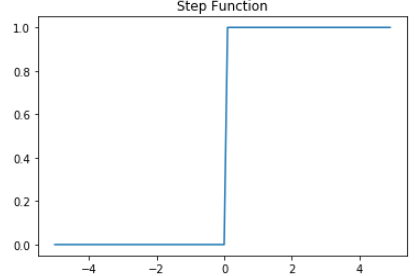

이를 수식으로 표현하면 다음과 같다.

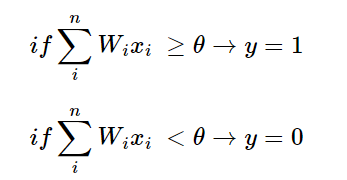

## 단층 퍼셉트론

단층 퍼셉트론은 값을 보내는 단계와 값을 받아 출력하는 두 단계로만 이루어진다. 이를 각각 입력층과 출력층이라고 부른다.

단층 퍼셉트론은 직선이다.

따라서 단층 퍼셉트론이 풀 수 있는 문제에는 한계가 있다. XOR GATE가 바로 그 예시이다.

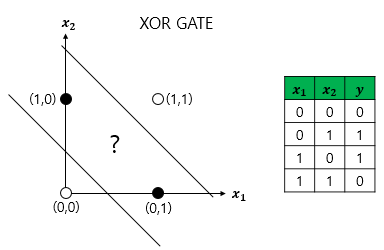

In [5]:
import torch
import torch.nn as nn

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [10]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [7]:
# 1개의 뉴런을 가지는 단층 퍼셉트론 구현
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [8]:
# 비용 함수 옵티마이저
criterion = nn.BCELoss().to(device) # 이진 분류이므로 이진 크로스엔트로피 사용
optim = torch.optim.SGD(model.parameters(), lr=1)

In [11]:
for step in range(10001):
  optim.zero_grad()

  hypothesis = model(X)

  cost = criterion(hypothesis, Y)
  cost.backward()

  optim.step()

  if step % 100 == 0: # 100번째 에포크마다 비용 출력
      print(step, cost.item())

0 0.7194157242774963
100 0.6931481957435608
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

100번 에포크 이후로 오차가 감소하지 않는다. 

이는 단층 퍼셉트론이 XOR 문제를 풀 수 없음을 의미한다.

In [12]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


## 다층 퍼셉트론

In [13]:
model = nn.Sequential(
    nn.Linear(2, 10, bias=True), nn.Sigmoid(),
    nn.Linear(10, 10, bias=True), nn.Sigmoid(),
    nn.Linear(10, 10, bias=True), nn.Sigmoid(),
    nn.Linear(10, 1, bias=True), nn.Sigmoid()
)

In [14]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [15]:
for epoch in range(10001):
  optimizer.zero_grad()

  hypothesis = model(X)

  cost = criterion(hypothesis, Y)
  cost.backward()

  optimizer.step()

  if epoch % 100 == 0:
    print(epoch, cost.item())

0 0.6931471228599548
100 0.6931437253952026
200 0.6931411027908325
300 0.6931383609771729
400 0.6931357383728027
500 0.6931328177452087
600 0.6931297183036804
700 0.693126380443573
800 0.693122923374176
900 0.6931191086769104
1000 0.6931148767471313
1100 0.6931103467941284
1200 0.6931052803993225
1300 0.6930993795394897
1400 0.693092942237854
1500 0.6930854916572571
1600 0.6930768489837646
1700 0.6930667161941528
1800 0.6930547952651978
1900 0.693040668964386
2000 0.6930233836174011
2100 0.6930022835731506
2200 0.6929757595062256
2300 0.692942202091217
2400 0.6928983926773071
2500 0.6928396224975586
2600 0.6927588582038879
2700 0.6926430463790894
2800 0.6924688816070557
2900 0.6921904683113098
3000 0.6917062997817993
3100 0.6907575130462646
3200 0.688510000705719
3300 0.681006908416748
3400 0.6340142488479614
3500 0.4938162565231323
3600 0.03237782418727875
3700 0.008379783481359482
3800 0.0044249542988836765
3900 0.0029233661480247974
4000 0.002153580542653799
4100 0.00169159867800772

오차가 점점 줄어든다. 즉, 잘 맞추게 되었다는 뜻.

In [16]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[8.0495949e-05]
 [9.9988198e-01]
 [9.9990010e-01]
 [1.1045339e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0
